In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from datetime import datetime

In [2]:
# Load and preprocess data
df = pd.read_csv('nighttimelight_UK.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

# Select relevant columns and rename
plot_df = df[['DATE', 'ONS', 'MLP', 'VIIRS', 'MLP_VIIRS', 'MLP_VIIRS_solo']].copy()


model_labels = {
    "ONS": "ONS Monthly GDP",
    "MLP": "MLP from main model",
    "VIIRS": "NTL",
    "MLP_VIIRS": "MLP with NTL",
    "MLP_VIIRS_solo": "MLP with only NTL"
}

# Melt the dataframe
melted_df = plot_df.melt(id_vars='DATE', var_name='Model', value_name='Value')

# Apply readable model labels AFTER melting
melted_df['Model'] = melted_df['Model'].map(model_labels)

# Define colors and line styles
model_colors = {
    "ONS Monthly GDP": "#000000",      # black
    "MLP from main model": "#4D4D4D",  # gray30
    "NTL": "#7F7F7F",                # gray50
    "MLP with NTL": "#999999",       # gray60
    "MLP with only NTL": "#B3B3B3"   # gray70
}

model_linetypes = {
    "ONS Monthly GDP": "solid",
    "MLP from main model": "solid",
    "NTL": "dashed",
    "MLP with NTL": "dotted",
    "MLP with only NTL": "dashdot"
}

/var/folders/1b/b3lsjhy10fsd753tw_292d5w0000gn/T/ipykernel_45115/1366393324.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


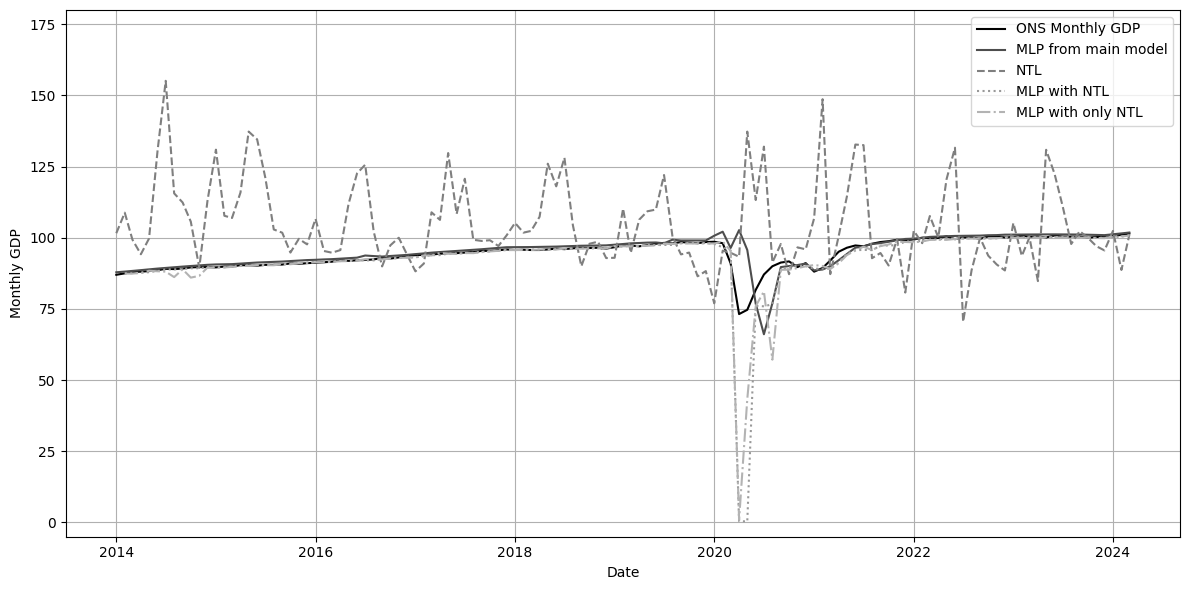

In [3]:
import matplotlib.pyplot as plt

raw_df = df[['DATE', 'ONS', 'MLP', 'VIIRS', 'MLP_VIIRS', 'MLP_VIIRS_solo']].copy()

model_names = {
    "ONS": "ONS Monthly GDP",
    "MLP": "MLP from main model",
    "VIIRS": "NTL",
    "MLP_VIIRS": "MLP with NTL",
    "MLP_VIIRS_solo": "MLP with only NTL"
}

plt.figure(figsize=(12, 6))

plt.plot(raw_df['DATE'], raw_df['ONS'],
         label=model_names['ONS'],
         color=model_colors["ONS Monthly GDP"],
         linestyle=model_linetypes["ONS Monthly GDP"])

# Plot all models
for col in ['MLP', 'VIIRS', 'MLP_VIIRS', 'MLP_VIIRS_solo']:
    plt.plot(raw_df['DATE'], raw_df[col],
             label=model_names[col],
             color=model_colors.get(model_names[col], '#888888'),
             linestyle=model_linetypes.get(model_names[col], 'solid'))

plt.ylim(-5, 180)

plt.ylabel("Monthly GDP")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("UK_nighttime.pdf", bbox_inches='tight', dpi=500)
plt.show()


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

models = ['MLP', 'VIIRS', 'MLP_VIIRS', 'MLP_VIIRS_solo']
results = []

for model in models:
    con_col = model
    con_valid = df[['ONS', con_col]].dropna()
    y_true_con = con_valid['ONS']
    y_pred_con = con_valid[con_col]

    ann_col = f'{model}_ann'
    ann_valid = df[['ONS_ann', ann_col]].dropna()
    y_true_ann = ann_valid['ONS_ann']
    y_pred_ann = ann_valid[ann_col]
    
    mae = mean_absolute_error(y_true_con, y_pred_con)
    rmse = mean_squared_error(y_true_con, y_pred_con) ** 0.5
    corr = np.corrcoef(y_true_con, y_pred_con)[0, 1]
    sign_acc = (np.sign(y_true_ann) == np.sign(y_pred_ann)).mean()

    results.append({
        'Model': model,
        'MAE': mae,
        'RMSE': rmse,
        'Correlation': corr,
        'Sign Accuracy': sign_acc
    })

results_df = pd.DataFrame(results)
print(results_df)



            Model        MAE       RMSE  Correlation  Sign Accuracy
0             MLP   1.535613   4.114032     0.704994       0.906780
1           VIIRS  13.960228  19.621896    -0.270772       0.491525
2       MLP_VIIRS   1.937384   9.598493     0.790664       0.931624
3  MLP_VIIRS_solo   1.801251   7.831966     0.805198       0.880342
